# Scalability Benchmark Plots

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Simulator

In [2]:
laptop = [
    (1, 194.798),
    (2, 112.986),
    (4, 58.7018),
    (6, 45.5371),
    (12, 47.42196)
]

# Note, we runned the benchmark with different values of n
# Thus do not compare the absolute values between `laptop` list
# and the `usc` list - look only at the relative speedup
usc = [
    (1, 346.155),
    (2, 175.282),
    (4, 81.590),
    (8, 58.340),
    (16, 31.658)
]

# In theory the cluster had 48 cores, but we share the resources with
# other researchers and 4 cores were used for other operations.
# Thus, we tested the scaling only up to 44 cores.
isi = [
    (1, 823.6926),
    (2, 413.9971),
    (4, 235.6208),
    (8, 124.3406),
    (11, 87.7194),
    (22, 43.3502),
    (44, 38.3796)   
]

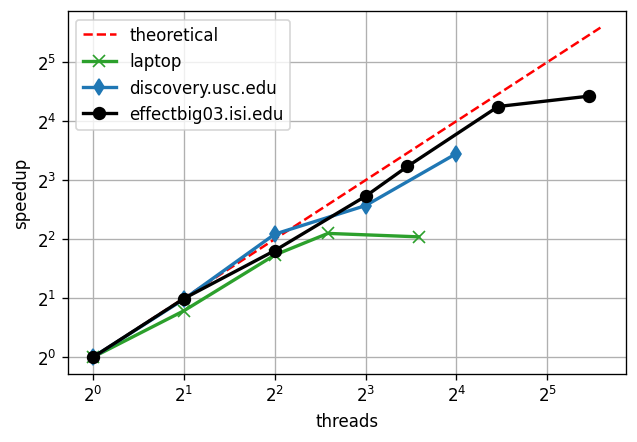

In [3]:
fig, ax = plt.subplots(dpi=120)

plt.plot([1, 48], [1, 48], 'r--', label='theoretical')

cpus, wall_time = zip(*laptop)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'x-', color='tab:green', label='laptop', linewidth=2, markersize=7)

cpus, wall_time = zip(*usc)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'd-', color='tab:blue', label='discovery.usc.edu', linewidth=2, markersize=7)

cpus, wall_time = zip(*isi)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'ko-', label='effectbig03.isi.edu', linewidth=2, markersize=7)

ax.set_xlabel('threads')
ax.set_ylabel('speedup')
ax.legend()
ax.grid()
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
plt.show()

## Emulator

In [4]:
onenode = [
    (1, 7*60+31.420),
    (2, 3*60+56.321),
    (4, 2*60+9.187),
    (8, 1*60+28.667),
    (16, 1*60+3.179)
]

manynodes_gcp = [
    (1, 11*60+56.317),
    (2, 5*60+52.364),
    (4, 3*60+5.853),
    (8, 1*60+42.706),
    (16, 0*60+58.912)
]

manynodes_usc = [
    (1, 16*60 + 32.246),  
    (2, 8*60+55.681),
    (4, 4*60+27.773),
    (8, 2*60+37.488),
]

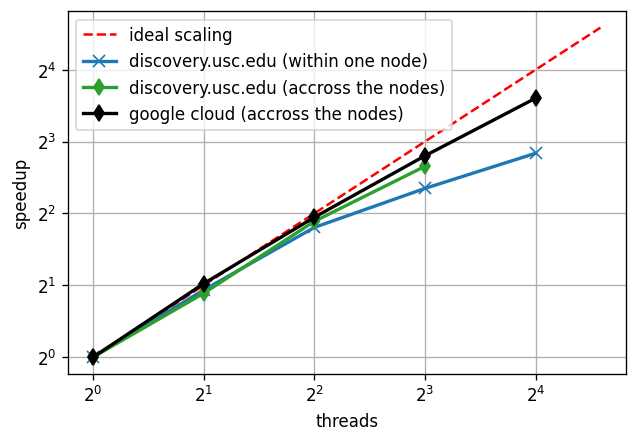

In [5]:
fig, ax = plt.subplots(dpi=120)

plt.plot([1, 24], [1, 24], 'r--', label='ideal scaling')

cpus, wall_time = zip(*onenode)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'x-', color='tab:blue', label='discovery.usc.edu (within one node)', linewidth=2, markersize=7)

cpus, wall_time = zip(*manynodes_usc)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'd-', color='tab:green', label='discovery.usc.edu (accross the nodes)', linewidth=2, markersize=7)

cpus, wall_time = zip(*manynodes_gcp)
speedup = wall_time[0]/np.array(wall_time)
plt.plot(cpus, speedup, 'd-', color='black', label='google cloud (accross the nodes)', linewidth=2, markersize=7)


ax.set_xlabel('threads')
ax.set_ylabel('speedup')
ax.legend()
ax.grid()
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
plt.show()